
>#     **PRACTICA DE LA ASIGNATURA *NATURAL LANGUAGE PROCESSING - NLP -***
                                                                          Profesor  David Torrej√≥n Moya
                                                                            Alumno  Francisco Javier Gonz√°lvez Chico

# Introducci√≥n 

La idea de la pr√°ctica es visitar aquellos temas que en cierta manera nos permitan ver m√°s contenido del curso.

La pr√°ctica esta dividida en 4 o 5 subapartados, que ya ten√©is en este mismo Notebook. Estos subapartados estan aqu√≠ para que rellen√©is el c√≥digo que hace falta para la realizaci√≥n de la pr√°ctica. Obviamente pod√©is usar tantas celdas como os hagan falta, es m√°s es de agradecer si el c√≥digo final esta algo "limpio". Usar funciones, algo de comentario, etc, etc...

Usaremos 2 datasets, uno para el primer ejercicio, y otro para el resto de ejercicios.

Ejercicios:


1.   Machine Learning vs Deep Learning (Acordaros que hay que implementar el pipeline visto en clase entero)

    1.1. Implementaci√≥n de un modelo de Sentiment Analysis con alg√∫n algoritmo de Machine Learning Cl√°sico.
    
    1.2. Implementaci√≥n de un modelo de Sentiment Analysis con alguna arquitectura de Deep Learning.
    
    1.3. Breve Comparaci√≥n de resultados. Confusion Matrix.
    
2. Hacer Analysis de los tweets del segundo dataset. Que temas aparecen? Como se representan estos temas? De que hablan unos y otros?

3. Escoged a uno de los dos presidentes, y escribid tweets como ellos, usando un Modelo Generativo.

En cada ejercicio, espero explicaciones y razonamientos del porque una arquitectura y no otra, por ejemplo en Deep Learning, porque usar Convolutionals en lugar de recurrentes, o en Machine Learning, Bayes en lugar de SVM. Hay que explicar el pipeline, sobretodo el preproceso de datos, con lo que habr√° que hacer un peque√±o estudio de que datos tenemos, y si hay cosas que se pueden ignorar, si hac√©is stemming, o no, etc, etc...

Acordaros de que objetivo final no es que obteng√°is una accuracy brutal, es que comprendais que pasa cuando usais un algoritmo u otro, y que problemas o beneficios nos dan.

![IMAGEN](https://i.pinimg.com/736x/19/63/8c/19638c0b33e2f7822d6806ce31d89d84--funny-cartoons-funny-jokes.jpg)

Mucha suerte y √°nimo!



># **IMPORTACIONES Y DESCARGAS NECESARIAS**



In [72]:
# EJECUTAR SIEMPRE, LAS PRIMERAS, TODAS LAS CELDAS HASTA -EJERCICIO 1-

from google.colab import files, drive

import numpy as np
import pandas as pd
import io
import re
import spacy

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

from keras.layers import Embedding, Input, Dense, Dropout, Concatenate, Conv2D, GlobalMaxPooling2D, Reshape, Average, average, Lambda, CuDNNLSTM, LSTM, Bidirectional
from keras.models import Model
from keras.callbacks import Callback, EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from keras import backend as K

from gensim import corpora, models, similarities
from gensim.corpora import Dictionary
from gensim.models import CoherenceModel

from random import sample, shuffle, choice
from collections import Counter
from math import exp
from copy import copy

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline

drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
# instalamos e importamos la librer√≠a de contraciones del ingl√©s

!pip install contractions

import contractions

     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 317kB 13.9MB/s 
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 245kB 57.2MB/s 
  Created wheel for pyahocorasick: filename=pyahocorasick-1.4.0-cp36-cp36m-linux_x86_64.whl size=81702 sha256=8e9bd74899d28d8011bd7767fee3485ac9d5d727d0fffd3212e0c5a7d69fedfd
  Stored in directory: /root/.cache/pip/wheels/0a/90/61/87a55f5b459792fbb2b7ba6b31721b06ff5cf6bde541b40994
Successfully built pyahocorasick


In [3]:
# instalamos e importamos la librer√≠a de stop words

!pip install stop_words

from stop_words import get_stop_words

stop_words = get_stop_words('en')
nlp = spacy.load('en_core_web_sm')

  Created wheel for stop-words: filename=stop_words-2018.7.23-cp36-none-any.whl size=32917 sha256=3c42fda0439324d36a8e56497f88477ccfde77b3f24363fb8e32fdcecece2ee4
  Stored in directory: /root/.cache/pip/wheels/75/37/6a/2b295e03bd07290f0da95c3adb9a74ba95fbc333aa8b0c7c78
Successfully built stop-words


In [4]:
# instalamos e importamos la librer√≠a de visualizaci√≥n pyLDAvis

!pip install pyLDAvis

import pyLDAvis.gensim

     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1.6MB 6.5MB/s 
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 552kB 46.5MB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-2.1.2-py2.py3-none-any.whl size=97711 sha256=6da64d6d3376dada13fcbbfae859ca77e10c119de3b7c4cb4b9905490d3db185
  Stored in directory: /root/.cache/pip/wheels/98/71/24/513a99e58bb6b8465bae4d2d5e9dba8f0bef8179e3051ac414
  Created wheel for funcy: filename=funcy-1.14-py2.py3-none-any.whl size=32042 sha256=e84782d0149ff9a22f6f15ed9d7c65743c689dcffbae7171be18a29544740f98
  Stored in directory: /root/.cache/pip/wheels/20/5a/d8/1d875df03deae6f178dfdf70238cca33f948ef8a6f5209f2eb
Successfully built pyLDAvis funcy


In [5]:
# descargamos el fichero de Jerga de Dimitrios Effrosynidis

!wget https://raw.githubusercontent.com/Deffro/text-preprocessing-techniques/master/slang.txt

# creamos un diccionario de jerga y su conversi√≥n correcta... lo usaremos en los preprocesamientos de los datasets
jerga = pd.read_csv("slang.txt", header = None, encoding = 'latin1', delimiter = "\t")
jerga.columns = ['Jerga', 'Texto']

jerga_dict = dict([(Jerga, Texto) for Jerga, Texto in zip(jerga.Jerga, jerga.Texto)])

--2020-02-21 19:27:40--  https://raw.githubusercontent.com/Deffro/text-preprocessing-techniques/master/slang.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5181 (5.1K) [text/plain]
Saving to: ‚Äòslang.txt‚Äô

slang.txt           100%[===================>]   5.06K  --.-KB/s    in 0s      

2020-02-21 19:27:40 (57.1 MB/s) - ‚Äòslang.txt‚Äô saved [5181/5181]



># **EJERCICIO 1**
###<pre>      ***Machine Learning vs Deep Learning***



>># **Dataset**



#####<pre>      Cargamos el Dataset "train_sentiment.csv"

In [0]:
uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving train_sentiment.csv to train_sentiment.csv
User uploaded file "train_sentiment.csv" with length 8664015 bytes


#####<pre>      Obtenemos una breve descripci√≥n, su estructura y le damos un primer vistazo

In [0]:
df1 = pd.read_csv(io.StringIO(uploaded['train_sentiment.csv'].decode('ISO-8859-1')))

print("\t\t NULOS\n", "\t\t-------\n", df1.isnull().any(), "\n\n", sep = '')

df1.describe()

		 NULOS
		-------
ItemID           False
Sentiment        False
SentimentText    False
dtype: bool




ItemID     Sentiment
count   99989.000000  99989.000000
mean    50005.110042      0.564632
std     28865.894393      0.495808
min         1.000000      0.000000
25%     25009.000000      0.000000
50%     50006.000000      1.000000
75%     75003.000000      1.000000
max    100000.000000      1.000000

In [0]:
df1

ItemID  Sentiment                                      SentimentText
0           1          0                       is so sad for my APL frie...
1           2          0                     I missed the New Moon trail...
2           3          1                            omg its already 7:30 :O
3           4          0            .. Omgaga. Im sooo  im gunna CRy. I'...
4           5          0           i think mi bf is cheating on me!!!   ...
...       ...        ...                                                ...
99984   99996          0  @Cupcake  seems like a repeating problem   hop...
99985   99997          1  @cupcake__ arrrr we both replied to each other...
99986   99998          0                     @CuPcAkE_2120 ya i thought so 
99987   99999          1  @Cupcake_Dollie Yes. Yes. I'm glad you had mor...
99988  100000          1                    @cupcake_kayla haha yes you do 

[99989 rows x 3 columns]

#####<pre>      Observamos que el Dataset tiene 99.689 filas y 3 columnas sin valores nulos
~~~
          > La primera columna -ItemID- es discreta [min = 1 ; max = 100.000], un identificador num√©rico √∫nico
            Suponemos que este dataset tuvo originalmente 100K filas y que en alg√∫n tratamiento anterior (probablemente una eliminaci√≥n 
            de filas vac√≠as) se descartaron 11 de sus registros
          > La segunda columna -Sentiment- es binaria [0 / 1] y se trata de la etiqueta indicadora del problema a resolver
          > La tercera columna -SentimentText- [string], contiene el texto a analizar en el problema
~~~

In [0]:
# eliminamos la columna ItemID ya que no nos va a aportar informaci√≥n √∫til

df1.drop(['ItemID'], axis = 1, inplace = True)

In [0]:
print("     COUNT\n", "    -------\n", df1['Sentiment'].value_counts(), "\n\n", sep = '')

for i in range(0, 10):
  print(df1['Sentiment'][i], "\t", df1['SentimentText'][i])

     COUNT
    -------
1    56457
0    43532
Name: Sentiment, dtype: int64


0 	                      is so sad for my APL friend.............
0 	                    I missed the New Moon trailer...
1 	               omg its already 7:30 :O
0 	           .. Omgaga. Im sooo  im gunna CRy. I've been at this dentist since 11.. I was suposed 2 just get a crown put on (30mins)...
0 	          i think mi bf is cheating on me!!!       T_T
0 	          or i just worry too much?        
1 	        Juuuuuuuuuuuuuuuuussssst Chillin!!
0 	        Sunny Again        Work Tomorrow  :-|       TV Tonight
1 	       handed in my uniform today . i miss you already
1 	       hmmmm.... i wonder how she my number @-)


#####<pre>      El Dataset est√° bastante balanceado con respecto a la etiqueta [1 - 56.46%  / 0 - 43.54%]
~~~
        A la vista de la etiqueta y del texto completo de los 10 primeros registros:
          > El valor 0 de la etiqueta apunta a un sentimiento negativo y el 1 a un sentimiento positivo
~~~

In [0]:
# transformamos la etiqueta para que sea m√°s significativa

for fila in range(0, len(df1)):
  etiqueta = df1.loc[fila, 'Sentiment']

  etiqueta = 'POS' if etiqueta == 1 else 'NEG'

  df1.loc[fila, 'Sentiment'] = etiqueta

In [0]:
# funci√≥n para extraer las palabras de la columna -SentimentText-

def extraer_vocab(df):
  vocab = list()

  for index, row in df.iterrows():
    for word in row['SentimentText'].strip().split(' '):
      if word not in vocab:
        vocab.append(word)

  print(f"N√∫mero de Palabras: {len(vocab)}")

  return vocab

In [0]:
vocab = extraer_vocab(df1)

N√∫mero de Palabras: 183645


#####<pre>      La columna -SentimentText- contiene 183.645 tokens diferentes, un vocabulario (creemos) demasiado amplio

>># **Pipeline**

#####<pre>        Nos enfrentamos a un problema de clasificaci√≥n 'Supervised Learning'

![](https://dzone.com/storage/temp/3307020-ml-pipeline.png)



>># **Preprocesamiento**



#####<pre>      Bajamos a local el vocabulario obtenido para poder analizarlo con detalle (colab es limitado para esto)

In [0]:
v_df = pd.DataFrame({"words": vocab})
v_df.to_csv('/content/gdrive/My Drive/NLP/Practica Final/vocab.csv', sep = ';', decimal = '.', index = False)

#####<pre>      Tras observar el vocabulario, vemos que contiene muchas palabras 'complicadas' para nuestro trabajo:
~~~
          > Espacios sobrantes a izquierda y derecha de las palabras
          > Palabras mal escritas, may√∫sculas incorrectas y letras muy repetidas para inferir √©nfasis (gunna, YouuuuU)
          > N√∫meros, Fechas y Horas
          > Caracteres Especiales
          > Emojis
          > Menciones de usuarios (@martin)
          > Hashtags (#lovesongs)
          > URLs
          > Jerga y Contracciones del lenguaje
          > Signos de puntuaci√≥n
~~~

#####<pre>      Trataremos el vocabulario combinando t√©cnicas de [**Dimitrios Effrosynidis**](https://github.com/Deffro/text-preprocessing-techniques) y [**Adriano Carmezim**](https://github.com/Carmezim/crypto-twitter-sentiment-analysis) 

In [0]:
# limpiamos en un orden l√≥gico

for fila in range(0, len(df1)):
  texto = df1.loc[fila, 'SentimentText']

  # Ponemos todo en min√∫sculas
  texto = texto.lower()

  # Eliminamos el texto unicode ("\u002c", "x96", """)
  texto = re.sub(r'(\\u[0-9A-Fa-f]+)', '', texto)       
  texto = re.sub(r'[^\x00-\x7f]', '', texto)

  # Convertimos los Emojis Positivos
  texto = re.sub(r'(:\s?\)|:-\)|\(\s?:|\(-:|:\'\)|:\s?D|:-D|x-?D|X-?D|@-\)|<3|:\*|;-?\)|;-?D|\(-?;)', 'EMO_POS', texto)
  
  # Convertimos los Emojis Negativos
  texto = re.sub(r'(:\s?\(|:-\(|\)\s?:|\)-:|:,\(|:\'\(|:"\()|:-\||t_t', 'EMO_NEG', texto)

  # Eliminamos las URLs ya que entendemos que no aportar√°n informaci√≥n significativa al modelo
  texto = re.sub(r'((www\.[\S]+)|(https?://[\S]+))', '', texto)
  texto = re.sub(r'((www\.[^\s]+)|(https?://[^\s]+))', '', texto)

  # Eliminamos las menciones de usuarios porque creemos que los nombres o alias no tendr√°n significaci√≥n en nuestro an√°lisis
  texto = re.sub(r'@[\S]+', '', texto)
  texto = re.sub(r'@[^\s]+', '', texto)

  # Eliminamos los hashtags porque aunque quiza alguno pudiera apuntar un sentimiento, normalmente suelen ser palabras unidas #contraelcancer que no podr√°n aportar a nuestro an√°lisis 
  texto = re.sub(r'#([^\s]+)', '', texto)
  texto = re.sub(r'#(\S+)', '', texto)

  # Eliminamos las siglas de los retweets 
  texto = re.sub(r'\brt\b', '', texto)

  # Eliminamos los signos de puntuaci√≥n
  texto = re.sub(r'[\'"?!,.():;]', '', texto)

  # Eliminamos los caracteres especiales
  texto = re.sub(r'[^a-zA-z0-9\s]', '', texto)
  
  for t in texto.split(' '):    
    # Convertimos las repeticiones masivas de letras
    texto = texto.replace(t, re.sub(r'(.)\1+', r'\1\1', t))

    # Convertimos la jerga
    if t in jerga_dict:
      texto = texto.replace(t, jerga_dict[t])

  # Traducimos las contracciones
  texto = contractions.fix(texto)

  # Eliminamos los n√∫meros
  texto = re.sub(r'[0123456789]', '', texto)

  # Eliminamos los espacios en blanco sobrantes
  texto = texto.strip()
  texto = re.sub(r'\s+', ' ', texto)

  df1.loc[fila, 'SentimentText'] = texto

#####<pre>      Veamos como ha quedado el vocabulario

In [0]:
vocab = extraer_vocab(df1)

N√∫mero de Palabras: 62981


#####<pre>      La columna -SentimentText- se ha reducido notablemente, de 183.645 a 62.981 tokens diferentes

#####<pre>      Lemmatizaremos, apoy√°ndonos en la librer√≠a **spacy**, con objeto de normalizar el texto en lo posible

In [0]:
for fila in range(0, len(df1)):
  texto = nlp(df1.loc[fila, 'SentimentText'])
  texto = ' '.join([t.lemma_ if t.lemma_ != '-PRON-' else t.text for t in texto])

  df1.loc[fila, 'SentimentText'] = texto

#####<pre>      Decidimos no utilizar la eliminaci√≥n de stop-words
~~~
          Consideramos que muchas de estas palabras pueden ser significativas para nuestro sentiment analysis
~~~

In [0]:
# Veamos como ha quedado nuestro dataset
print("\t\t NULOS\n", "\t\t-------\n", df1.isnull().any(), "\n\n", sep = '')

df1.describe()

		 NULOS
		-------
Sentiment        False
SentimentText     True
dtype: bool




Sentiment SentimentText
count      99989         99444
unique         2         95802
top          POS         thank
freq       56457           256

#####<pre>      Como nos tem√≠amos, al eliminar tantos tokens suplerfluos se han vaciado totalmente algunos -SentimentText-

In [0]:
print(f"SentimentText est√° a 'null' en {df1['SentimentText'].isnull().sum()} registros\nProcedemos a eliminar estos registros que han quedado inservibles\n\n")

# Procedemos a eliminar los nulos
df1 = df1.drop(df1[(df1['SentimentText'].isnull())].index)

df1.describe()

SentimentText esta a 'null' en 545 registros
Procedemos a eliminar estos registros que han quedado inservibles




Sentiment SentimentText
count      99444         99444
unique         2         95802
top          POS         thank
freq       56124           256

---

In [0]:
# guardamos el trabajo para evitar reprocesos posteriores

df1.to_csv('/content/gdrive/My Drive/NLP/Practica Final/df1.csv', sep = ';', decimal = '.', index = False)

---

In [0]:
# desde aqui cargamos el dataset ya preprocesado (limpio)

df1 = pd.read_csv('/content/gdrive/My Drive/NLP/Practica Final/df1.csv', sep = ';', decimal = '.')

---

>># **Partici√≥n del Dataset**



#####<pre>      Reducimos el dataset a su quinta parte, ya que casi 100K filas ser√°n demasiadas para entrenar los modelos

In [0]:
# aprovechamos la aleatoriedad de train_test_split para elegir la quinta parte de los registros del dataset

resto, df2 = train_test_split(df1, test_size = 0.2, shuffle = True, random_state = 0)

print(f"El dataset reducido a su quinta parte tiene {df2.shape[0]} filas")

El dataset reducido a su quinta parte tiene 19889 filas


#####<pre>      Realizamos las tres particiones:
~~~
          > un 70% del dataset servir√° para el entrenamiento
          > un 10% del dataset servir√° para la validaci√≥n
          > un 20% del dataset servir√° para el testeo
~~~

In [0]:
trainT, test = train_test_split(df2, test_size = 0.2, shuffle = True, random_state = 0)
train, validate = train_test_split(trainT, test_size = 0.1, shuffle = True, random_state = 0)

print(f"El conjunto Train    ha quedado con {train.shape[0]} filas y {train.shape[1]} columnas")
print(f"El conjunto Validate ha quedado con  {validate.shape[0]} filas y {validate.shape[1]} columnas")
print(f"El conjunto Test     ha quedado con  {test.shape[0]} filas y {test.shape[1]} columnas")

El conjunto Train    ha quedado con 14319 filas y 2 columnas
El conjunto Validate ha quedado con  1592 filas y 2 columnas
El conjunto Test     ha quedado con  3978 filas y 2 columnas


In [0]:
# preparamos los datos

# para los modelos de Machine Learning utilizaremos para entrenar la partici√≥n trainT (train + validate)
values_trnT = trainT.values

X_trnT = values_trnT[:, 1]
y_trnT = values_trnT[:, 0]

# para los modelos de Deep Learning utilizaremos en el entrenamiento train y validate por separado
values_trn = train.values
values_vld = validate.values
values_tst = test.values

X_trn = values_trn[:, 1]
y_trn = values_trn[:, 0]

X_vld = values_vld[:, 1]
y_vld = values_vld[:, 0]

X_tst = values_tst[:, 1]
y_tst = values_tst[:, 0]

>># **Modelo Machine Learning *Naive Bayes***

#####<pre>      El primer modelo predictor ML que implementaremos ser√° un clasificador *Naive Bayes*:
~~~
          > Generaremos un Pipeline con un extractor de caracter√≠sticas y el modelo a entrenar
~~~

In [0]:
pipeline_nb = Pipeline([('extractor', CountVectorizer()),
                        ('modelo', MultinomialNB())])

# veamos que par√°metros podemos configurar
pipeline_nb.get_params()

{'extractor': CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                 dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                 lowercase=True, max_df=1.0, max_features=None, min_df=1,
                 ngram_range=(1, 1), preprocessor=None, stop_words=None,
                 strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                 tokenizer=None, vocabulary=None),
 'extractor__analyzer': 'word',
 'extractor__binary': False,
 'extractor__decode_error': 'strict',
 'extractor__dtype': numpy.int64,
 'extractor__encoding': 'utf-8',
 'extractor__input': 'content',
 'extractor__lowercase': True,
 'extractor__max_df': 1.0,
 'extractor__max_features': None,
 'extractor__min_df': 1,
 'extractor__ngram_range': (1, 1),
 'extractor__preprocessor': None,
 'extractor__stop_words': None,
 'extractor__strip_accents': None,
 'extractor__token_pattern': '(?u)\\b\\w\\w+\\b',
 'extractor__tokenizer': None,
 'extractor__vocabulary': None,
 

#####<pre>      Para el ***extractor*** dejaremos la mayor√≠a de valores a parametrizar por defecto, excepto:
~~~
          > max_df:      para asegurarnos que se ignoren palabras altamente repetidas (compensando as√≠ no haber filtrado las stop-words)
          > ngram_range: para probar con diferentes tama√±os de n-grams
~~~
#####<pre>      Para el ***modelo*** dejaremos todos los valores a parametrizar por defecto, excepto:
~~~
          > alpha: para probar con diferentes regularizaciones
~~~

In [0]:
parameters_grid_nb = {'extractor__max_df': (0.5, 0.75, 1.0),
                      'extractor__ngram_range': ((1, 1), (1, 2), (1, 3), (2, 3), (1, 4)),
                      'modelo__alpha': (1, 1e-1, 1e-2, 1e-3)}

# definimos nuestra grid de entreno
gs_nb = GridSearchCV(pipeline_nb, parameters_grid_nb, n_jobs = -1, verbose = 1)

# entrenamos la grid para obtener la mejor parametrizaci√≥n
# denotar que para los modelos de Machine Learning utilizaremos para el entrenamiento los conjuntos -train- y -validate- juntos
gs_nb.fit(X_trnT, y_trnT)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   24.2s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  4.4min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('extractor',
                                        CountVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.int64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                                    

In [0]:
# presentamos la mejor parametrizaci√≥n obtenida para el modelo NB
best_params_nb = gs_nb.best_estimator_.get_params()

print("La mejor parametrizaci√≥n obtenida por la Grid para el modelo NB es:")
for param_name in sorted(parameters_grid_nb.keys()):
    print("\t%s: %r" % (param_name, best_params_nb[param_name]))
print("\nMejor score: %0.3f" % gs_nb.best_score_)

La mejor parametrizaci√≥n obtenida por la Grid para el modelo NB es:
	extractor__max_df: 0.5
	extractor__ngram_range: (1, 2)
	modelo__alpha: 1

Mejor score: 0.741


#####<pre>     Nos parece que el mejor ***score*** obtenido en train por el modelo *Naive Bayes* es decente pero no demasiado bueno

#####<pre>     Parametrizaremos el ***pipeline*** con estos *mejores par√°metros* obtenidos

In [0]:
# para sucesivas sesiones, evitamos entrenar de nuevo la grid imponiendo manualmente los mejores par√°metros obtenidos
# pipeline_nb.set_params(**best_params_nb)

pipeline_nb = Pipeline([('extractor', CountVectorizer(max_df = 0.5, ngram_range = (1, 2))),
                        ('modelo', MultinomialNB(alpha = 1))])

pipeline_nb.fit(X_trnT, y_trnT)

Pipeline(memory=None,
         steps=[('extractor',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=0.5,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 2), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('modelo',
                 MultinomialNB(alpha=1, class_prior=None, fit_prior=True))],
         verbose=False)

#####<pre>     Evaluaremos el modelo contra el conjunto de datos de test

In [0]:
scoring_nb = pipeline_nb.score(X_tst, y_tst)
print("El scoring de accuracy obtenido para el modelo NB en test es %0.3f" % scoring_nb)

El scoring de accuracy obtenido para el modelo NB en test es 0.743


#####<pre>      Veamos su matriz de confusi√≥n

In [0]:
# funci√≥n para pintar la matriz de confusi√≥n 
def plot_confusion_matrix(confmat, modelo, fsc):
    fig, ax = plt.subplots(figsize = (6, 6))
    ax.matshow(confmat, cmap = plt.cm.Purples, alpha = 0.5)

    for i in range(confmat.shape[0]):
        for j in range(confmat.shape[1]):
            ax.text(x = j, y = i, s = confmat[i, j], va = 'center', ha = 'center', size = 16)
    
    ax.xaxis.set_ticks_position('bottom')
    title = modelo + f'\nF1-SCORE: %0.3f' % fsc

    plt.title(title, size = 20)   
    plt.xlabel('predicci√≥n', size = 16)
    plt.ylabel('etiqueta', size = 16)

    target_names = ['NEG', "POS"]
    tick_marks = np.arange(len(target_names))
    plt.xticks(tick_marks, target_names)
    plt.yticks(tick_marks, target_names)

    plt.tight_layout()
    plt.show()

# funci√≥n para obtener el F1-SCORE
def calculo_fsc(tp, fp, fn):
  sen = tp / (tp + fn)
  ppv = tp / (tp + fp)
  fsc = 2 * (sen * ppv / (sen + ppv))

  return fsc

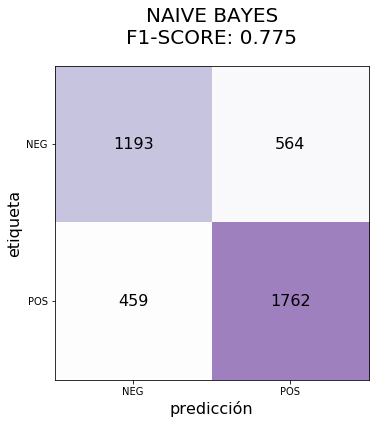


El conjunto de test tiene 3978 registros:
	 ¬∑ 1193 + 564 = 1757 mensajes negativos
	 ¬∑ 459 + 1762 = 2221 mensajes positivos

La matriz de confusi√≥n nos dice que de los 1757 mensajes con etiqueta NEG:
	 ¬∑ 1193 se est√°n prediciendo correctamente [predicci√≥n = NEG]
	 ¬∑ 564 se est√°n prediciendo como falsos positivos [predicci√≥n = POS]

Y que de los 2221 mensajes con etiqueta POS:
	 ¬∑ 1762 se est√°n prediciendo correctamente [predicci√≥n = POS]
	 ¬∑ 459 se est√°n prediciendo como falsos negativos [predicci√≥n = NEG]


In [0]:
y_pred_nb = pipeline_nb.predict(X_tst)
confmat_nb = confusion_matrix(y_tst, y_pred_nb)
tn, fp, fn, tp = confusion_matrix(y_tst, y_pred_nb).ravel()
fsc_nb = calculo_fsc(tp, fp, fn)
plot_confusion_matrix(confmat_nb, 'NAIVE BAYES', fsc_nb)

print(f"\nEl conjunto de test tiene {tn + fp + fn + tp} registros:")
print(f"\t ¬∑ {tn} + {fp} = {tn + fp} mensajes negativos\n\t ¬∑ {fn} + {tp} = {tp + fn} mensajes positivos")
print(f"\nLa matriz de confusi√≥n nos dice que de los {tn + fp} mensajes con etiqueta NEG:")
print(f"\t ¬∑ {tn} se est√°n prediciendo correctamente [predicci√≥n = NEG]")
print(f"\t ¬∑ {fp} se est√°n prediciendo como falsos positivos [predicci√≥n = POS]")
print(f"\nY que de los {tp + fn} mensajes con etiqueta POS:")
print(f"\t ¬∑ {tp} se est√°n prediciendo correctamente [predicci√≥n = POS]")
print(f"\t ¬∑ {fn} se est√°n prediciendo como falsos negativos [predicci√≥n = NEG]")

>># **Modelo Machine Learning *Support Vector Machine (SVM)***

#####<pre>      El segundo modelo predictor ML que implementaremos ser√° un clasificador *SVM*:
~~~
          > Generaremos un Pipeline con un extractor de caracter√≠sticas y el modelo a entrenar (las SVM ya integran un par√°metro regularizador)
~~~

In [0]:
pipeline_svm = Pipeline([('extractor', CountVectorizer()),
                         ('modelo', SVC(class_weight = 'balanced', probability = True))])

# veamos que par√°metros podemos configurar
pipeline_svm.get_params()

{'extractor': CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                 dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                 lowercase=True, max_df=1.0, max_features=None, min_df=1,
                 ngram_range=(1, 1), preprocessor=None, stop_words=None,
                 strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                 tokenizer=None, vocabulary=None),
 'extractor__analyzer': 'word',
 'extractor__binary': False,
 'extractor__decode_error': 'strict',
 'extractor__dtype': numpy.int64,
 'extractor__encoding': 'utf-8',
 'extractor__input': 'content',
 'extractor__lowercase': True,
 'extractor__max_df': 1.0,
 'extractor__max_features': None,
 'extractor__min_df': 1,
 'extractor__ngram_range': (1, 1),
 'extractor__preprocessor': None,
 'extractor__stop_words': None,
 'extractor__strip_accents': None,
 'extractor__token_pattern': '(?u)\\b\\w\\w+\\b',
 'extractor__tokenizer': None,
 'extractor__vocabulary': None,
 

#####<pre>      Para el ***extractor*** dejaremos la mayor√≠a de valores a parametrizar por defecto, excepto:
~~~
          > analyzer:    probaremos con palabras y caracteres
          > max_df:      para asegurarnos que se ignoren palabras altamente repetidas (compensando as√≠ no haber filtrado las stop-words)
          > ngram_range: para probar con diferentes tama√±os de n-grams
~~~
#####<pre>      Para el ***modelo*** dejaremos la mayor√≠a de valores a parametrizar por defecto, excepto:
~~~
          > kernel: para probar lineal y exponencial
          > C:      para probar diferentes grados de regularizaci√≥n
~~~

In [0]:
# esta es la grid de par√°metros con la que deseabamos entrenar la SVM
# no entendemos porqu√© (probablemente por falta de recursos) no nos ha sido posible finalizar ning√∫n entrenamiento con estos juegos de valores y lo hemos intentado repetidas veces
# de hecho (como se puede observar en la siguiente celda) para poder ver una finalizaci√≥n del entrenamiento hemos tenido que reducirlos al m√≠nimo e incluso disminuir el K-fold a 3 

parameters_grid_svm = {'extractor__analyzer': ('word', 'char'),
                       'extractor__max_df': (0.5, 0.75, 1.0),
                       'extractor__ngram_range': ((1, 3), (2, 3), (1, 4)),
                       'modelo__kernel': ('rbf', 'linear'),
                       'modelo__C': (1, 1e-1)}

In [0]:
# grid reducida a su m√≠nima expresi√≥n 
parameters_grid_svm = {'modelo__C': (1, 1e-1)}

# definimos nuestra grid de entreno con disminuci√≥n del K-fold a 3
gs_svm = GridSearchCV(pipeline_svm, parameters_grid_svm, n_jobs = -1, verbose = 1, cv = 3)

# entrenamos la grid para obtener la mejor parametrizaci√≥n
# denotar que para los modelos de Machine Learning utilizaremos para el entrenamiento los conjuntos -train- y -validate- juntos.
gs_svm.fit(X_trnT, y_trnT)

Fitting 3 folds for each of 2 candidates, totalling 6 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:  7.2min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('extractor',
                                        CountVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.int64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                                       

In [0]:
# presentamos la mejor parametrizaci√≥n obtenida para el modelo SVM
best_params_svm = gs_svm.best_estimator_.get_params()

print("La mejor parametrizaci√≥n obtenida por la Grid para el modelo SVM es:")
for param_name in sorted(parameters_grid_svm.keys()):
    print("\t%s: %r" % (param_name, best_params_svm[param_name]))
print("\nMejor score: %0.3f" % gs_svm.best_score_)

La mejor parametrizaci√≥n obtenida por la Grid para el modelo SVM es:
	modelo__C: 1

Mejor score: 0.734


#####<pre>     Parece que el mejor ***score*** obtenido en train por el modelo *SVM* [0.734] es peor que el del *Naive Bayes*
~~~
          Debemos indicar (tal y como se puede ver en las celdas de entrenamiento de este modelo SVM) que nos ha sido imposible entrenarlo
          con la parametrizaci√≥n deseada
          Para poder ver finalizar el entrenamientos tuvimos que reducir la parametrizaci√≥n al m√≠nimo e incluso disminuir el K-fold a 3
          Y el resultado fue la parametrizaci√≥n por defecto del Pipeline
          Muy probablemente, conociendo la potencia de las Support Vector Machines, de haber podido ejecutar un mejor entrenamiento, como
          pretendiamos, con varios par√°metros y diferentes valores, su score final hubiera mejorado bastante al del modelo Naive Bayes
~~~

#####<pre>     Parametrizaremos el ***pipeline*** con estos *mejores par√°metros* obtenidos

In [0]:
# para sucesivas sesiones, evitamos entrenar de nuevo la grid imponiendo manualmente los mejores par√°metros obtenidos
# pipeline_svm.set_params(**best_params_svm)

pipeline_svm = Pipeline([('extractor', CountVectorizer()),
                         ('modelo', SVC(C = 1, class_weight = 'balanced', probability = True))])

pipeline_svm.fit(X_trnT, y_trnT)

Pipeline(memory=None,
         steps=[('extractor',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('modelo',
                 SVC(C=1, break_ties=False, cache_size=200,
                     class_weight='balanced', coef0=0.0,
                     decision_function_shape='ovr', degree=3, gamma='scale',
                     kernel='rbf', max_iter=-1, probability=True,
                     random_state=None, shr

#####<pre>     Evaluaremos el modelo contra el conjunto de datos de test

In [0]:
scoring_svm = pipeline_svm.score(X_tst, y_tst)
print("El scoring de accuracy obtenido para el modelo SVM en test es %0.3f" % scoring_svm)

El scoring de accuracy obtenido para el modelo SVM en test es 0.761


#####<pre>     Sorprendentemente, la *SVM* con su parametrizaci√≥n por defecto, supera el score del *Naive Bayes*

#####<pre>      Veamos su matriz de confusi√≥n

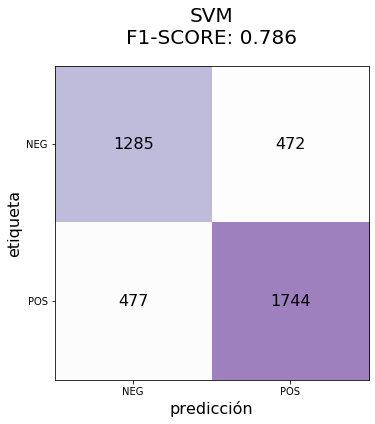


El conjunto de test tiene 3978 registros:
	 ¬∑ 1285 + 472 = 1757 mensajes negativos
	 ¬∑ 477 + 1744 = 2221 mensajes positivos

La matriz de confusi√≥n nos dice que de los 1757 mensajes con etiqueta NEG:
	 ¬∑ 1285 se est√°n prediciendo correctamente [predicci√≥n = NEG]
	 ¬∑ 472 se est√°n prediciendo como falsos positivos [predicci√≥n = POS]

Y que de los 2221 mensajes con etiqueta POS:
	 ¬∑ 1744 se est√°n prediciendo correctamente [predicci√≥n = POS]
	 ¬∑ 477 se est√°n prediciendo como falsos negativos [predicci√≥n = NEG]


In [0]:
y_pred_svm = pipeline_svm.predict(X_tst)
confmat_svm = confusion_matrix(y_tst, y_pred_svm)
tn, fp, fn, tp = confusion_matrix(y_tst, y_pred_svm).ravel()
fsc_svm = calculo_fsc(tp, fp, fn)
plot_confusion_matrix(confmat_svm, 'SVM', fsc_svm)

print(f"\nEl conjunto de test tiene {tn + fp + fn + tp} registros:")
print(f"\t ¬∑ {tn} + {fp} = {tn + fp} mensajes negativos\n\t ¬∑ {fn} + {tp} = {tp + fn} mensajes positivos")
print(f"\nLa matriz de confusi√≥n nos dice que de los {tn + fp} mensajes con etiqueta NEG:")
print(f"\t ¬∑ {tn} se est√°n prediciendo correctamente [predicci√≥n = NEG]")
print(f"\t ¬∑ {fp} se est√°n prediciendo como falsos positivos [predicci√≥n = POS]")
print(f"\nY que de los {tp + fn} mensajes con etiqueta POS:")
print(f"\t ¬∑ {tp} se est√°n prediciendo correctamente [predicci√≥n = POS]")
print(f"\t ¬∑ {fn} se est√°n prediciendo como falsos negativos [predicci√≥n = NEG]")

>># **Modelo Deep Learning *Convolutional Neural Network (CNN)***

#####<pre>      El primer modelo predictor DL que implementaremos ser√° una Red Convolucional

#####<pre>      Pero lo primero ser√° preparar los datos de entrenamiento para el Deep Learning
~~~
          Este preprocesamiento en el que tokenizaremos los registros para extraer el vocabulario y marcar el umbral de descarte de
          registros outliers, lo realizaremos √∫nicamente sobre los 14.319 registros del conjunto de entrenamiento
          Los conjuntos de validaci√≥n y testeo ser√°n sometidos despu√©s a la preparaci√≥n basada en las referencias tomadas de train,
          para as√≠ medir objetivamente la capacidad de predicci√≥n de los modelos
~~~

In [0]:
# funci√≥n para el tokenizado de las particiones de datos
def tokenizado(textos, clases):
  tokens = []
  docs_tokenizados = []

  for x, y in zip(textos, clases):
      token = [t.text for t in nlp(x)]
      tokens += token
      docs_tokenizados.append((token, y))
  
  return tokens, docs_tokenizados

In [0]:
# tokenizamos los datos del conjunto de train

tokens, docs_trn = tokenizado(X_trn, y_trn)

print(f"Tenemos {len(docs_trn)} registros y {len(tokens)} tokens/palabras en el conjunto de train")

Tenemos 14319 registros y 182855 tokens/palabras en el conjunto de train


In [0]:
# vocabulario de los datos de train

vocab_counter = Counter(tokens)
vocab = list(vocab_counter.keys())

print(f"Tenemos {len(vocab)} tokens/palabras diferentes en el conjunto de train")

Tenemos 15416 tokens/palabras diferentes en el conjunto de train


In [0]:
# tratamiento de outliers

# longitud m√°xima de los documentos
maxlen = max([len(x) for x, _ in docs_trn])

# longitud de cada documento
lens = [len(x) for x, _ in docs_trn]

# mediana de la lista de longitudes de documento
mediana = np.median(np.array(lens))
media = np.mean(np.array(lens))

# calculamos el l√≠mite outlier como el doble de la mediana
maxlen = int(mediana)*2

print(f"Mediana de las longitudes de documento en train: {int(mediana)} palabras")
print(f"M√°xima Longitud, l√≠mite outlier: {maxlen} palabras")

# filtramos los documentos tokenizados para desechar los que tienen mas de 24 palabras
docs_trn_ok = [(x, y) for x, y in docs_trn if len(x) <= maxlen]

print(f"\nEl conjunto de train sin outliers queda con {len(docs_trn_ok)} documentos")
print(f"Se desechan {len(docs_trn) - len(docs_trn_ok)} documentos demasiado largos.")

Mediana de las longitudes de documento en train: 12 palabras
M√°xima Longitud, l√≠mite outlier: 24 palabras

El conjunto de train sin outliers queda con 13402 documentos
Se desechan 917 documentos demasiado largos.


In [0]:
# indexamos el vocabulario y las etiquetas
w2id = {k:i for i, k in enumerate(vocab)}

labels = ['NEG', 'POS']
l2id = {label:i for i, label in enumerate(labels)}

# a√±adimos el PAD <UNK> al vocabulario indexado para poder clasificar palabras desconocidas o que no aparezcan un m√≠nimo de veces en el corpus
w2id['<UNK>'] = len(w2id)

In [0]:
# funci√≥n para realizar el encoder de los conjuntos de datos particionados
def encoder_corpus(data, maxlen, vocab_counter, w2id, min_apar):
  corpus = list()

  for x, y in data:
    texto = np.zeros((maxlen))
    label = np.zeros(2)

    if y == 'NEG':
      label[0] = 1
    else:
      label[1] = 1

    for i, t in enumerate(x):
        texto[i] = w2id[t] if t in vocab_counter and vocab_counter[t] >= min_apar else w2id['<UNK>']

    corpus.append((texto, label))
  
  x, y = zip(*corpus)
  textos = np.array(list(x))
  labels = np.array(list(y))

  return textos, labels

In [0]:
# establecemos que para considerar un token/palabra debe haber aparecido en el vocabulario total al menos 5 veces
MIN_APARICIONES = 5

# codificamos el conjunto de datos de entrenamiento
textos_trn, labels_trn = encoder_corpus(docs_trn_ok, maxlen, vocab_counter, w2id, MIN_APARICIONES)

print(f"El formato de las features de train ha quedado con {textos_trn.shape[1]} columnas")

El formato de las features de train ha quedado con 24 columnas


In [0]:
# realizamos el mismo tokenizado, tratamiento de outliers y encoder para los datos de los conjuntos de validaci√≥n y test, tomando como referencia el vocabulario de train

_, docs_vld = tokenizado(X_vld, y_vld)
docs_vld_ok = [(x, y) for x, y in docs_vld if len(x) <= maxlen]
textos_vld, labels_vld  = encoder_corpus(docs_vld_ok, maxlen, vocab_counter, w2id, MIN_APARICIONES)

_, docs_tst = tokenizado(X_tst, y_tst)
docs_tst_ok = [(x, y) for x, y in docs_tst if len(x) <= maxlen]
textos_tst, labels_tst  = encoder_corpus(docs_tst_ok, maxlen, vocab_counter, w2id, MIN_APARICIONES)

#####<pre>      Montamos nuestra arquitectura CNN

In [0]:
# capa de entrada con 24 neuronas
input_layer = Input(shape = (maxlen,))

# capa embedding con 100 vectores clasificadores de salida
embedding = Embedding(output_dim = 100, input_dim = len(w2id), input_length = maxlen)(input_layer)

# capa de reestructuraci√≥n
reshape = Reshape((maxlen, 100, 1))(embedding)

# tres capas convolucionales 2D (activadas por 'relu'), con MaxPooling (para reducir overfitting) que filtrar√°n en paralelo con diferentes kernel
conv_1 = Conv2D(filters = 50, kernel_size = (1, 100), activation = 'relu', padding = 'valid')(reshape)
mp_1 = GlobalMaxPooling2D()(conv_1)
conv_2 = Conv2D(filters = 50, kernel_size = (2, 100), activation = 'relu', padding = 'valid')(reshape)
mp_2 = GlobalMaxPooling2D()(conv_2)
conv_5 = Conv2D(filters = 50, kernel_size = (5, 100), activation = 'relu', padding = 'valid')(reshape)
mp_5 = GlobalMaxPooling2D()(conv_5)

# concatenamos las salidas de las capas convolucionales para que entren en la etapa final
concatenacion = Concatenate()([mp_1, mp_2, mp_5])

# 2 capas densas (activadas por 'relu') con dropout (para reducir overfitting)
dense_1 = Dense(100, activation = 'relu')(concatenacion)
drop_1 = Dropout(0.5)(dense_1)
dense_2 = Dense(100, activation = 'relu')(drop_1)
drop_2 = Dropout(0.5)(dense_2)

# capa densa de salida (softmax) con las clases a predecir
out_layer = Dense(len(l2id), activation = 'softmax')(drop_2)

# definimos el modelo CNN
model_cnn = Model(inputs = input_layer, outputs = out_layer)

# compilamos 
model_cnn.compile(loss = 'categorical_crossentropy', optimizer = 'rmsprop', metrics = ['accuracy'])

model_cnn.summary()





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 24)           0                                            
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 24, 100)      1541700     input_1[0][0]                    
__________________________________________________________________________________________________
reshape_1 (Reshape)             (None, 24, 100, 1)   0           embedding_1[0][0]                
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 24, 1, 50)    5050        resha

In [0]:
# entrenamos nuestro modelo CNN 5 √©pocas con batch_size 256, evalu√°ndolo contra los datos de validaci√≥n 
model_cnn.fit(textos_trn, labels_trn, epochs = 5, batch_size = 256,
              validation_data = (textos_vld, labels_vld))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 13402 samples, validate on 1473 samples
Epoch 1/5





13402/13402 [==============================] - 7s 504us/step - loss: 0.6348 - acc: 0.6386 - val_loss: 0.5348 - val_acc: 0.7373
Epoch 2/5
13402/13402 [==============================] - 6s 425us/step - loss: 0.5214 - acc: 0.7481 - val_loss: 0.5037 - val_acc: 0.7631
Epoch 3/5
13402/13402 [==============================] - 6s 432us/step - loss: 0.4719 - acc: 0.7814 - val_loss: 0.5008 - val_acc: 0.7542
Epoch 4/5
13402/13402 [==============================] - 6s 424us/step - loss: 0.4390 - acc: 0.8008 - val_loss: 0.4981 - val_acc: 0.7631
Epoch 5/5
13402/13402 [==============================] - 6s 422us/step - loss: 0.4097 - acc: 0.8191 - val_loss: 0.5332 - val_acc: 0.7583


In [0]:
scoring_cnn = model_cnn.evaluate(textos_tst, labels_tst)

print("El scoring de accuracy obtenido para el modelo CNN en test es %0.3f" % scoring_cnn[1])

3741/3741 [==============================] - 0s 105us/step
El scoring de accuracy obtenido para el modelo CNN en test es 0.748


#####<pre>     La *CNN* obtiene un scoring intermedio entre los modelos de ML *Naive Bayes* y *SVM*
~~~
          A la vista de la sucesion de las √©pocas de entrenamiento, la CNN tiende al overfitting
          Hemos decidido no entrenar mas √©pocas, ni bajar el batch_size por este motivo... parece que memoriza los datos
          de train sin mejorar nada contra el conjunto de validaci√≥n
~~~

#####<pre>     Veamos su matriz de confusi√≥n

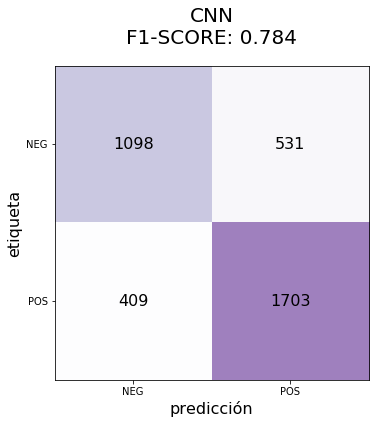


El conjunto de test tiene 3741 registros:
	 ¬∑ 1098 + 531 = 1629 mensajes negativos
	 ¬∑ 409 + 1703 = 2112 mensajes positivos

La matriz de confusi√≥n nos dice que de los 1629 mensajes con etiqueta NEG:
	 ¬∑ 1098 se est√°n prediciendo correctamente [predicci√≥n = NEG]
	 ¬∑ 531 se est√°n prediciendo como falsos positivos [predicci√≥n = POS]

Y que de los 2112 mensajes con etiqueta POS:
	 ¬∑ 1703 se est√°n prediciendo correctamente [predicci√≥n = POS]
	 ¬∑ 409 se est√°n prediciendo como falsos negativos [predicci√≥n = NEG]


In [0]:
predictions_cnn = model_cnn.predict(textos_tst)
confmat_cnn = confusion_matrix(labels_tst.argmax(axis = 1), predictions_cnn.argmax(axis = 1))
tn, fp, fn, tp = confusion_matrix(labels_tst.argmax(axis = 1), predictions_cnn.argmax(axis = 1)).ravel()
fsc_cnn = calculo_fsc(tp, fp, fn)
plot_confusion_matrix(confmat_cnn, 'CNN', fsc_cnn)

print(f"\nEl conjunto de test tiene {tn + fp + fn + tp} registros:")
print(f"\t ¬∑ {tn} + {fp} = {tn + fp} mensajes negativos\n\t ¬∑ {fn} + {tp} = {tp + fn} mensajes positivos")
print(f"\nLa matriz de confusi√≥n nos dice que de los {tn + fp} mensajes con etiqueta NEG:")
print(f"\t ¬∑ {tn} se est√°n prediciendo correctamente [predicci√≥n = NEG]")
print(f"\t ¬∑ {fp} se est√°n prediciendo como falsos positivos [predicci√≥n = POS]")
print(f"\nY que de los {tp + fn} mensajes con etiqueta POS:")
print(f"\t ¬∑ {tp} se est√°n prediciendo correctamente [predicci√≥n = POS]")
print(f"\t ¬∑ {fn} se est√°n prediciendo como falsos negativos [predicci√≥n = NEG]")

>># **Modelo Deep Learning *Arquitectura DAN***

#####<pre>      El segundo modelo predictor DL que implementaremos ser√° una Arquitectura DAN

In [0]:
# funciones auxiliares

def mask_aware_mean(x):
    mask = K.not_equal(K.sum(K.abs(x), axis = 2, keepdims = True), 0)
    n = K.sum(K.cast(mask, 'float32'), axis = 1, keepdims = False)
    x_mean = K.sum(x, axis=1, keepdims = False) / n
    return x_mean

def mask_aware_mean_output_shape(input_shape):
    shape = list(input_shape)
    assert len(shape) == 3
    return (shape[0], shape[2])

In [0]:
# capa de entrada con 24 neuronas
input_layer_2 = Input(shape = (maxlen,))

# capa embedding con 100 vectores clasificadores de salida
embedding_2 = Embedding(output_dim = 100, input_dim = len(w2id), input_length = maxlen)(input_layer_2)

# capa de promediado de features embeddings
promediado = Lambda(mask_aware_mean, mask_aware_mean_output_shape, name='embedding_average')(embedding_2)

# 2 capas densas (activadas por 'relu') con dropout (para reducir overfitting)
dense_1_2 = Dense(100, activation = 'relu')(promediado)
drop_1_2 = Dropout(0.75)(dense_1_2)
dense_2_2 = Dense(100, activation = 'relu')(drop_1_2)
drop_2_2 = Dropout(0.75)(dense_2_2)

# capa densa de salida (softmax) con las clases a predecir
out_layer_2 = Dense(len(l2id), activation = 'softmax')(drop_2_2)

# definimos el modelo CNN
model_dan = Model(inputs = input_layer_2, outputs = out_layer_2)

# compilamos 
model_dan.compile(loss = 'categorical_crossentropy', optimizer = 'rmsprop', metrics = ['accuracy'])

model_dan.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 24)                0         
_________________________________________________________________
embedding_2 (Embedding)      (None, 24, 100)           1541700   
_________________________________________________________________
embedding_average (Lambda)   (None, 100)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 100)               10100     
_________________________________________________________________
dropout_3 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 100)               10100     
_________________________________________________________________
dropout_4 (Dropout)          (None, 100)               0   

In [0]:
# entrenamos nuestro modelo DAN 5 √©pocas con batch_size 256, evalu√°ndolo contra los datos de validaci√≥n 
model_dan.fit(textos_trn, labels_trn, epochs = 5, batch_size = 256,
              validation_data = (textos_vld, labels_vld))

Train on 13402 samples, validate on 1473 samples
Epoch 1/5
13402/13402 [==============================] - 2s 147us/step - loss: 0.6818 - acc: 0.5622 - val_loss: 0.6690 - val_acc: 0.5743
Epoch 2/5
13402/13402 [==============================] - 2s 113us/step - loss: 0.6546 - acc: 0.6088 - val_loss: 0.6000 - val_acc: 0.6864
Epoch 3/5
13402/13402 [==============================] - 2s 116us/step - loss: 0.5850 - acc: 0.7030 - val_loss: 0.5474 - val_acc: 0.7400
Epoch 4/5
13402/13402 [==============================] - 2s 116us/step - loss: 0.5352 - acc: 0.7460 - val_loss: 0.5186 - val_acc: 0.7542
Epoch 5/5
13402/13402 [==============================] - 2s 116us/step - loss: 0.5039 - acc: 0.7686 - val_loss: 0.5142 - val_acc: 0.7542


In [0]:
scoring_dan = model_dan.evaluate(textos_tst, labels_tst)

print("El scoring de accuracy obtenido para el modelo DAN en test es %0.3f" % scoring_dan[1])

3741/3741 [==============================] - 0s 39us/step
El scoring de accuracy obtenido para el modelo DAN en test es 0.758


#####<pre>     La *DAN* obtiene el mejor scoring de todos los modelos vistos
~~~
          Esta arquitectura parece que tambi√©n tiende al overfitting
          Al igual que con la CNN, hemos decidido no entrenar mas √©pocas, ni bajar el batch_size por este motivo
~~~

#####<pre>     Veamos su matriz de confusi√≥n

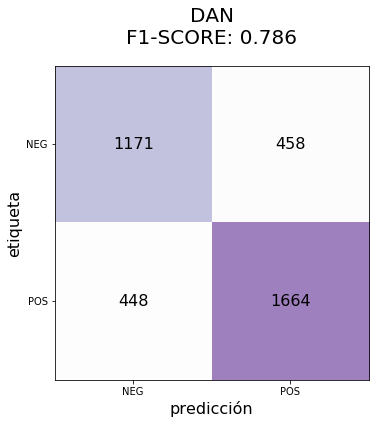


El conjunto de test tiene 3741 registros:
	 ¬∑ 1171 + 458 = 1629 mensajes negativos
	 ¬∑ 448 + 1664 = 2112 mensajes positivos

La matriz de confusi√≥n nos dice que de los 1629 mensajes con etiqueta NEG:
	 ¬∑ 1171 se est√°n prediciendo correctamente [predicci√≥n = NEG]
	 ¬∑ 458 se est√°n prediciendo como falsos positivos [predicci√≥n = POS]

Y que de los 2112 mensajes con etiqueta POS:
	 ¬∑ 1664 se est√°n prediciendo correctamente [predicci√≥n = POS]
	 ¬∑ 448 se est√°n prediciendo como falsos negativos [predicci√≥n = NEG]


In [0]:
predictions_dan = model_dan.predict(textos_tst)
confmat_dan = confusion_matrix(labels_tst.argmax(axis = 1), predictions_dan.argmax(axis = 1))
tn, fp, fn, tp = confusion_matrix(labels_tst.argmax(axis = 1), predictions_dan.argmax(axis = 1)).ravel()
fsc_dan = calculo_fsc(tp, fp, fn)
plot_confusion_matrix(confmat_dan, 'DAN', fsc_dan)

print(f"\nEl conjunto de test tiene {tn + fp + fn + tp} registros:")
print(f"\t ¬∑ {tn} + {fp} = {tn + fp} mensajes negativos\n\t ¬∑ {fn} + {tp} = {tp + fn} mensajes positivos")
print(f"\nLa matriz de confusi√≥n nos dice que de los {tn + fp} mensajes con etiqueta NEG:")
print(f"\t ¬∑ {tn} se est√°n prediciendo correctamente [predicci√≥n = NEG]")
print(f"\t ¬∑ {fp} se est√°n prediciendo como falsos positivos [predicci√≥n = POS]")
print(f"\nY que de los {tp + fn} mensajes con etiqueta POS:")
print(f"\t ¬∑ {tp} se est√°n prediciendo correctamente [predicci√≥n = POS]")
print(f"\t ¬∑ {fn} se est√°n prediciendo como falsos negativos [predicci√≥n = NEG]")

>># **Todos los Modelos Prediciendo**

#####<pre>     Vamos a elegir 20 registros POS y 20 NEG, al azar, de los datos que desechamos para reducir el dataset

In [0]:
values_resto = resto.values
n_regs = 20

# elegimos 20 registros 'POS' y 20 'NEG' (tenemos en cuenta que no superen el maxlen de palabras para que los modelos de depp learning puedan predecir)
ej_POS = sample([(label, text) for label, text in values_resto if (label == 'POS' and len(text.split(' ')) <= maxlen)], n_regs)
ej_NEG = sample([(label, text) for label, text in values_resto if (label == 'NEG' and len(text.split(' ')) <= maxlen)], n_regs)

# preparacion para ML
corpus = ej_POS + ej_NEG
y, x = zip(*corpus)
textos_ml = np.array(list(x), dtype = object)
labels_ml = np.array(list(y), dtype = object)

# preparacion para DL
_, textos_tk = tokenizado(textos_ml, labels_ml)
textos_tk_ok = [(x, y) for x, y in textos_tk if len(x) <= maxlen]
textos_dl, _  = encoder_corpus(textos_tk_ok, maxlen, vocab_counter, w2id, MIN_APARICIONES)

for i in range(0, len(ej_POS)):
  print(ej_POS[i], "\n\t\t\t\t\t\t\t\t\t\t\t", ej_NEG[i]) 

('POS', 'follow me so i can dm you my new like when i call and i get a personal greeting') 
											 ('NEG', 'i can haz umbrella but i be already damp from go to asda I will come and sing at you another time')
('POS', 'goodnight I be from vancouver bc') 
											 ('NEG', 'no more food for you')
('POS', 'people talk abt other people kidsall child be precious') 
											 ('NEG', 'aww poor grant look cool tho')
('POS', 'we end up do very little shopping and more wandering than anything my hubby wear me outi can not keep up with him') 
											 ('NEG', 'but its less than hour from you')
('POS', 'I be glad to hear your theory be at least well found so then who would apldeap be') 
											 ('NEG', 'I have be okay but a little sad because i be graduate i do not want to leave hsh')
('POS', 'basically and josh and mcnasty too') 
											 ('NEG', 'aghh i can not find the remote')
('POS', 'i think it be an awesome thing') 
											 ('NEG', 'hmm okayy I be really sorry to hear

#####<pre>     Veamos que predicciones nos dan nuestro cuatro modelos

In [0]:
preds_nb = pipeline_nb.predict(textos_ml)
preds_svm = pipeline_svm.predict(textos_ml)
preds_cnn = model_cnn.predict(textos_dl)
preds_dan = model_dan.predict(textos_dl)

In [0]:
# presentamos las predicciones tabuladas

n = 0
cont_pos = {'1_NB': 0, '2_SVM': 0, '3_CNN': 0, '4_DAN': 0}
cont_neg = {'1_NB': 0, '2_SVM': 0, '3_CNN': 0, '4_DAN': 0}

for i, j, k, l, m in zip(labels_ml, preds_nb, preds_svm, preds_cnn, preds_dan):
  if n == 0:
    print("+-------------------------------------------------------------------------+")
    print("|  ETIQUETAS  |                        PREDICCIONES                       |")
    print("|    REALES   |       NB            SVM            CNN            DAN     |")
    print("|-------------+--------------+--------------+--------------+--------------|")

  if l[0] > l[1]:
    l = 'NEG'
  else:
    l = 'POS'

  if m[0] > m[1]:
    m = 'NEG'
  else:
    m = 'POS'
  
  if i == 'POS':
    if j == i: cont_pos['1_NB'] += 1
    if k == i: cont_pos['2_SVM'] += 1
    if l == i: cont_pos['3_CNN'] += 1
    if m == i: cont_pos['4_DAN'] += 1
  else:
    if j == i: cont_neg['1_NB'] += 1
    if k == i: cont_neg['2_SVM'] += 1
    if l == i: cont_neg['3_CNN'] += 1
    if m == i: cont_neg['4_DAN'] += 1

  print(f"|     {i}     |  {j.lower()} ¬∑¬∑¬∑ {'OK' if j == i else 'KO'}  |  {k.lower()} ¬∑¬∑¬∑ {'OK' if k == i else 'KO'}  |  {l.lower()} ¬∑¬∑¬∑ {'OK' if l == i else 'KO'}  |  {m.lower()} ¬∑¬∑¬∑ {'OK' if m == i else 'KO'}  |")

  n += 1
  if (n == n_regs or n == 2*n_regs):
    print("+-------------+--------------+--------------+--------------+--------------+")

print("\n\nRecuento de aciertos POS: ", cont_pos, "\nRecuento de aciertos NEG: ", cont_neg)
print("\n\n          Recuento total: ", {k: cont_pos[k] + cont_neg[k] for k in cont_pos})

+-------------------------------------------------------------------------+
|  ETIQUETAS  |                        PREDICCIONES                       |
|    REALES   |       NB            SVM            CNN            DAN     |
|-------------+--------------+--------------+--------------+--------------|
|     POS     |  pos ¬∑¬∑¬∑ OK  |  neg ¬∑¬∑¬∑ KO  |  pos ¬∑¬∑¬∑ OK  |  pos ¬∑¬∑¬∑ OK  |
|     POS     |  pos ¬∑¬∑¬∑ OK  |  pos ¬∑¬∑¬∑ OK  |  pos ¬∑¬∑¬∑ OK  |  pos ¬∑¬∑¬∑ OK  |
|     POS     |  pos ¬∑¬∑¬∑ OK  |  pos ¬∑¬∑¬∑ OK  |  pos ¬∑¬∑¬∑ OK  |  pos ¬∑¬∑¬∑ OK  |
|     POS     |  pos ¬∑¬∑¬∑ OK  |  neg ¬∑¬∑¬∑ KO  |  neg ¬∑¬∑¬∑ KO  |  pos ¬∑¬∑¬∑ OK  |
|     POS     |  pos ¬∑¬∑¬∑ OK  |  pos ¬∑¬∑¬∑ OK  |  pos ¬∑¬∑¬∑ OK  |  pos ¬∑¬∑¬∑ OK  |
|     POS     |  pos ¬∑¬∑¬∑ OK  |  pos ¬∑¬∑¬∑ OK  |  pos ¬∑¬∑¬∑ OK  |  pos ¬∑¬∑¬∑ OK  |
|     POS     |  pos ¬∑¬∑¬∑ OK  |  pos ¬∑¬∑¬∑ OK  |  pos ¬∑¬∑¬∑ OK  |  pos ¬∑¬∑¬∑ OK  |
|     POS     |  pos ¬∑¬∑¬∑ OK  |  pos ¬∑¬∑¬∑ OK  |  pos ¬∑¬∑¬∑ OK  |  pos ¬∑¬∑¬

#####<pre>     Los resultados parecen responder a los ***scorings*** obtenidos por cada modelo
~~~
         La DAN es la que mejor predice, seguida de la CNN y la SVM (pr√°cticamente igualadas), quedando el Naive Bayes en √∫ltimo lugar
         Como es l√≥gico, los modelos de Deep Learning lo hacen mejor que los de Machine Learning (incluso habiendo entrenado con menos
         datos, ya que los modelos de Deep Learning no contaron con el conjunto de validate incluido en train)
         Aunque tambi√©n la SVM, recordemos que con la parametrizaci√≥n por defecto, est√° pr√°cticamente a su altura
                
~~~

#####<pre>     **CONCLUSIONES:** Los resultados prediciendo responden perfectamente a los F1-Score de los modelos.
#####<pre>                   Observamos que predicen mejor la etiqueta -POS-, la -NEG- les cuesta bastante m√°s.

># **EJERCICIO 2**
###<pre>      ***Tweet Analysis***



>># **Dataset**



#####<pre>      Cargamos el Dataset "dataset_2.json"

In [6]:
uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving dataset_2.json to dataset_2.json
User uploaded file "dataset_2.json" with length 1070528 bytes


#####<pre>      Obtenemos una breve descripci√≥n, su estructura y le damos un primer vistazo

In [7]:
df2 = pd.read_json(io.StringIO(uploaded['dataset_2.json'].decode('utf-8')))

df2

0     ...                                               5888
tweet  ‚ÄúLow plastic stool, cheap but delicious noodle...  ...  North Korea is behaving very badly. They have ...
label                                              OBAMA  ...                                              TRUMP

[2 rows x 5889 columns]

In [8]:
# mejor, transponemos el dataset
df2t = df2.T

# observamos duplicados en los tweets 0 y 1... es posible que haya m√°s, los eliminamos
df2t = df2t.drop_duplicates()

print("\t NULOS\n", "\t-------\n", df2t.isnull().any(), "\n\n", sep = '')

df2t.describe()

	 NULOS
	-------
tweet    False
label    False
dtype: bool




tweet  label
count                                                5723   5723
unique                                               5723      2
top     Celebrate President Obama's birthday by wishin...  TRUMP
freq                                                    1   2862

#####<pre>      Observamos que el Dataset ten√≠a 5.889 tweets y tras la eliminaci√≥n de duplicaciones queda con 5.723
~~~
          > La primera columna -tweet- [string], contiene el texto a analizar en el problema
          > La segunda columna -label- es binaria [OBAMA / TRUMP], indica el presidente autor del tweet
~~~

In [9]:
# reindexamos el dataset para que no nos falten claves (por la eliminaci√≥n de duplicaciones)
df2t = df2t.reset_index()

# eliminamos la columna index antigua (que se queda residente tras reindexar)
df2t.drop(['index'], axis = 1, inplace = True)

print("        COUNT\n", "       -------\n", df2t['label'].value_counts(), "\n\n", sep = '')

tw_tr = ''
for i in range(0, 5):
  print(df2t['label'][i], "\t", df2t['tweet'][i])
  tw_tr = tw_tr + f"{df2t['label'][5722 - i]}\t{df2t['tweet'][5722 - i]}\n"

print(tw_tr)

        COUNT
       -------
TRUMP    2862
OBAMA    2861
Name: label, dtype: int64


OBAMA 	 ‚ÄúLow plastic stool, cheap but delicious noodles, cold Hanoi beer.‚Äù This is how I‚Äôll remember Tony. He taught us about food ‚Äî but more importantly, about its ability to bring us together. To make us a little less afraid of the unknown. We‚Äôll miss him. https://t.co/orEXIaEMZM
OBAMA 	 This National Gun Violence Awareness Day, show your commitment to keeping our kids safe from gun violence. Then, for everyone we‚Äôve lost, take action to change our leadership and our laws until they reflect that commitment - no matter how long it takes. https://t.co/lraIwlQAgl
OBAMA 	 We can never truly repay the debt we owe our fallen heroes. But we can remember them, honor their sacrifice, and affirm in our own lives those enduring ideals of justice, equality, and opportunity for which generations of Americans have given that last full measure of devotion. https://t.co/pRxwmaMClL
OBAMA 	 This Center is 

#####<pre>      El Dataset est√° perfectamente balanceado con respecto a la etiqueta [TRUMP - 50%  / OBAMA - 50%]

>># **Pipeline**

#####<pre>        Nos enfrentamos a un problema de Clasificaci√≥n No Supervisada 'Topic Modeling'

In [10]:
vocab = list()

for index, row in df2t.iterrows():
  for word in row['tweet'].strip().split(' '):
    if word not in vocab:
      vocab.append(word)

print(f"N√∫mero de Palabras: {len(vocab)}")

N√∫mero de Palabras: 21634


#####<pre>      La columna -tweet- contiene 21.634 tokens diferentes

>># **Preprocesamiento**



#####<pre>      Preprocesaremos de forma an√°loga a como lo hicimos en el Ejercicio 1 

In [0]:
# limpiamos en un orden l√≥gico

for fila in range(0, len(df2t)):
  texto = df2t.loc[fila, 'tweet']

  # Ponemos todo en min√∫sculas
  texto = texto.lower()

  # Eliminamos el texto unicode ("\u002c", "x96", """)
  texto = re.sub(r'(\\u[0-9A-Fa-f]+)', '', texto)       
  texto = re.sub(r'[^\x00-\x7f]', '', texto)

  # Eliminamos los Emojis Positivos
  texto = re.sub(r'(:\s?\)|:-\)|\(\s?:|\(-:|:\'\)|:\s?D|:-D|x-?D|X-?D|@-\)|<3|:\*|;-?\)|;-?D|\(-?;)', '', texto)
  
  # Eliminamos los Emojis Negativos
  texto = re.sub(r'(:\s?\(|:-\(|\)\s?:|\)-:|:,\(|:\'\(|:"\()|:-\||t_t', '', texto)

  # Eliminamos las URLs ya que entendemos que no aportar√°n informaci√≥n significativa al modelo
  texto = re.sub(r'((www\.[\S]+)|(https?://[\S]+))', '', texto)
  texto = re.sub(r'((www\.[^\s]+)|(https?://[^\s]+))', '', texto)

  # Eliminamos las menciones de usuarios porque creemos que los nombres o alias no tendr√°n significaci√≥n en nuestro an√°lisis
  texto = re.sub(r'@[\S]+', '', texto)
  texto = re.sub(r'@[^\s]+', '', texto)

  # Eliminamos los hashtags porque creemos que no aportar√°n a nuestro an√°lisis 
  texto = re.sub(r'#([^\s]+)', '', texto)
  texto = re.sub(r'#(\S+)', '', texto)

  # Eliminamos las siglas de los retweets 
  texto = re.sub(r'\brt\b', '', texto)

  # Eliminamos los signos de puntuaci√≥n
  texto = re.sub(r'[\'"?!,.():;]', '', texto)

  # Eliminamos los caracteres especiales
  texto = re.sub(r'[^a-zA-z0-9\s]', '', texto)
  
  for t in texto.split(' '):    
    # Convertimos las repeticiones masivas de letras
    texto = texto.replace(t, re.sub(r'(.)\1+', r'\1\1', t))

    # Convertimos la jerga
    if t in jerga_dict:
      texto = texto.replace(t, jerga_dict[t])

  # Traducimos las contracciones
  texto = contractions.fix(texto)

  # Eliminamos los n√∫meros
  texto = re.sub(r'[0123456789]', '', texto)

  # Eliminamos los espacios en blanco sobrantes
  texto = texto.strip()
  texto = re.sub(r'\s+', ' ', texto)

  df2t.loc[fila, 'tweet'] = texto

---

In [0]:
# guardamos el trabajo para evitar reprocesos posteriores y para utilizarlo en el Ejercicio 3

df2t.to_csv('/content/gdrive/My Drive/NLP/Practica Final/df2t.csv', sep = ';', decimal = '.', index = False)

---

In [0]:
# Cargamos el dataset ya preprocesado (limpio)

df2t = pd.read_csv('/content/gdrive/My Drive/NLP/Practica Final/df2t.csv', sep = ';', decimal = '.')

---

#####<pre>      Lemmatizaremos, apoy√°ndonos en la librer√≠a **spacy**, con objeto de normalizar el texto en lo posible

In [0]:
for fila in range(0, len(df2t)):
  texto = nlp(df2t.loc[fila, 'tweet'])
  texto = ' '.join([t.lemma_ if t.lemma_ != '-PRON-' else t.text for t in texto])

  df2t.loc[fila, 'tweet'] = texto

#####<pre>      Filtramos las **stop-words** y generamos dos listas con los documentos de cada presidente

In [0]:
docs_obama = list()
docs_trump = list()

for fila in range(0, len(df2t)):
  texto = [t.text for t in nlp(df2t.loc[fila, 'tweet']) if t.text not in stop_words]

  if df2t.loc[fila, 'label'] == 'OBAMA':
    docs_obama.append(texto)
  else:
    docs_trump.append(texto)

>># **Implementaci√≥n del Topic Modeling con *GENSIM & LDA***

In [0]:
# funci√≥n para obtener la grid de valores de coherencia seg√∫n el n√∫mero de topics (el modelo LDA va incluido)
def compute_coherence_values(dictionary, corpus, texts, limit = 10, start = 2, step = 1):
    coherence_values = []
    model_list = []

    for num_topics in range(start, limit, step):
        model = models.LdaModel(corpus, id2word = dictionary, num_topics = num_topics, iterations = 5, passes = 20, alpha = 'auto')
        model_list.append(model)
        cm = CoherenceModel(model = model, texts = texts, dictionary = dictionary, coherence = 'c_v')
        coherence_values.append(cm.get_coherence())

    return model_list, coherence_values

# funci√≥n para visualizar los valores de coherencia por n√∫mero de topics
def plot_cohe_topics(coherence_values, limit = 10, start = 2, step = 1):
  x = range(start, limit, step)
  plt.plot(x, coherence_values)
  plt.xlabel("N√∫mero de Topics")
  plt.ylabel("Coherence Score")
  plt.show()

#####<pre>      Analizaremos primero los tweets de **OBAMA**

In [0]:
# generamos el vocabulario gensim
gensim_dict_o = Dictionary(docs_obama)

# generamos con gensim el corpus 
corpus_o = [gensim_dict_o.doc2bow(doc) for doc in docs_obama]

print(f"Del presidente Obama tenemos {len(corpus_o)} documentos con {len(gensim_dict_o)} tokens/palabras diferentes")

Del presidente Obama tenemos 2861 documentos con 3051 tokens/palabras diferentes


#####<pre>      Entrenamos el modelo ***LDA*** que implementaremos

In [0]:
# Entrenamos modelos con valores para n√∫mero de topics del 2 al 10
model_list_o, coherence_values_o = compute_coherence_values(gensim_dict_o, corpus_o, docs_obama)

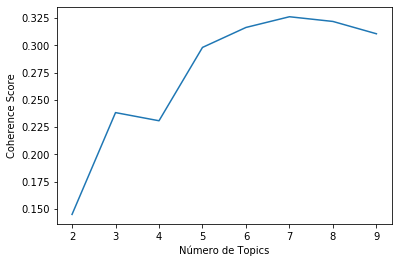

In [0]:
# Visualizamos el entrenamiento
plot_cohe_topics(coherence_values_o)

#####<pre>      Seg√∫n la gr√°fica, el n√∫mero de topics √≥ptimo para el modelo de clustering de tweets de **OBAMA** son **7**.

In [0]:
# implementamos el modelo con 7 topics
lda_o = models.LdaModel(corpus_o, id2word = gensim_dict_o, num_topics = 7, iterations = 5, passes = 20, alpha = 'auto')

In [0]:
# Visualizamos con pyLDAvis
vis_o = pyLDAvis.gensim.prepare(lda_o, corpus_o, gensim_dict_o)
pyLDAvis.display(vis_o)

/usr/local/lib/python3.6/dist-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


#####<pre>      Mi nivel de ingl√©s es paup√©rrimo y s√© si podr√© identificar claramente el contenido de los topics...
#####<pre>      ...pero arriesg√°ndome dir√≠a que probablemente OBAMA:
~~~
          > En el Topic 1 habla de temas como la inmigraci√≥n y la econom√≠a de las familias de clase media americana
          > En el Topic 2 habla del progreso y de la fortaleza de la econom√≠a de Am√©rica
          > En el Topic 3 trata temas de sanidad, salud, seguridad
          > En el Topic 4 habl√° de combatir la poluci√≥n y de acciones globales contra el cambio clim√°tico
          > En el Topic 5 parece que habla sobre alguna celebraci√≥n o cumplea√±os
          > El Topic 6 parece tratar temas de educaci√≥n
          > El Topic 7 podr√≠a tratar sobre alguna aparici√≥n que hiciera en directo hablando sobre econom√≠a, energ√≠a y crecimiento
~~~

#####<pre>      Vamos ahora con los tweets de **TRUMP**

In [0]:
# generamos el vocabulario gensim
gensim_dict_t = Dictionary(docs_trump)

# generamos con gensim el corpus 
corpus_t = [gensim_dict_t.doc2bow(doc) for doc in docs_trump]

print(f"Del presidente Trump tenemos {len(corpus_t)} documentos con {len(gensim_dict_t)} tokens/palabras diferentes")

Del presidente Trump tenemos 2862 documentos con 5086 tokens/palabras diferentes


#####<pre>      Entrenamos el modelo ***LDA*** que implementaremos

In [0]:
# Entrenamos modelos con valores para n√∫mero de topics del 2 al 10
model_list_t, coherence_values_t = compute_coherence_values(gensim_dict_t, corpus_t, docs_trump)

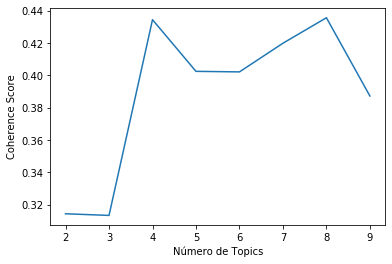

In [0]:
# Visualizamos el entrenamiento
plot_cohe_topics(coherence_values_t)

#####<pre>      Seg√∫n la gr√°fica, el n√∫mero de topics √≥ptimo para el modelo de clustering de tweets de **TRUMP** son **8**.

In [0]:
# implementamos el modelo con 8 topics
lda_t = models.LdaModel(corpus_t, id2word = gensim_dict_t, num_topics = 8, iterations = 5, passes = 20, alpha = 'auto')

In [0]:
# Visualizamos con pyLDAvis
vis_t = pyLDAvis.gensim.prepare(lda_t, corpus_t, gensim_dict_t)
pyLDAvis.display(vis_t)

/usr/local/lib/python3.6/dist-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


#####<pre>      ...y arriesg√°ndome de nuevo dir√≠a que probablemente TRUMP:
~~~
          > En el Topic 1 habla de leyes para la seguridad (veo la palabra 'wall' y recuerdo que quer√≠a erigir un muro para proteger la
            frontera con M√©xico)
          > En el Topic 2 parece hablar del gran coste del programa de salud 'ObamaCare'
          > En el Topic 3 habla de la pol√©mica con los mercados orientales (China y Corea)
          > En el Topic 4 habl√° de 'fake news' de la CNN sobre las elecciones
          > En el Topic 5 parece tratar de la campa√±a de desprestigio en las elecciones contra Hillary Clinton, de las investigaciones del
            posible espionaje ruso
          > En el Topic 6 habla de temas de impuestos varios y reformas
          > En el Topic 7 parece hablar de cosas que no le gustan: paises como Rusia, Siria, Puerto Rico, la organizaci√≥n terrorista Isis
          > En el Topic 8 parece hablar sobre alguna acci√≥n del gobierno en Florida, aunque tambi√©n aparece 'Vietnam'
~~~

># **EJERCICIO 3**
###<pre>      ***Tweet Generation***



#####<pre>      Utilizaremos el mismo dataset del Ejercicio 2 y en este caso no lo vamos a preprocesar
~~~
          Queremos tener los tweets tal cual se escriben para intentar simularlos, por tanto no vamos a aplicar tratamientos de limpieza,
          lemmatizaci√≥n, ni tampoco filtrar stop-words 
~~~

In [43]:
# transponemos el dataset
df3 = df2.T

# eliminamos los tweets duplicados
df3 = df3.drop_duplicates()

# reindexamos el dataset para que no nos falten claves (por la eliminaci√≥n de duplicaciones)
df3 = df3.reset_index()

# eliminamos la columna index antigua (que se queda residente tras reindexar)
df3.drop(['index'], axis = 1, inplace = True)

df3

tweet  label
0     ‚ÄúLow plastic stool, cheap but delicious noodle...  OBAMA
1     This National Gun Violence Awareness Day, show...  OBAMA
2     We can never truly repay the debt we owe our f...  OBAMA
3     This Center is for the leaders of tomorrow who...  OBAMA
4     Happy Mother‚Äôs Day to every mom out there, esp...  OBAMA
...                                                 ...    ...
5718  ...vast sums of money to NATO &amp; the United...  TRUMP
5719  Despite what you have heard from the FAKE NEWS...  TRUMP
5720  Great meeting with the @RepublicanStudy Commit...  TRUMP
5721  "The President Changed. So Has Small Businesse...  TRUMP
5722  North Korea is behaving very badly. They have ...  TRUMP

[5723 rows x 2 columns]

#####<pre>      Por su marcado carisma, gran desparpajo, enorme soberbia y demostrada incapacidad para gobernar el mundo...
#####<pre>      ...elegimos simular los tweets del **Pato Donald**... mil perdones... quer√≠a decir de **Donald Trump**

In [44]:
# seleccionamos los tweets de Trump
df3 = df3.drop(df3[(df3['label'] != 'TRUMP')].index)

# eliminamos la columna label
df3.drop(['label'], axis = 1, inplace = True)

df3

tweet
2861  My thoughts and prayers are with the families ...
2862  I am heading for Canada and the G-7 for talks ...
2863  Congratulations to the Washington Capitals on ...
2864  Looking forward to straightening out unfair Tr...
2865  Canada charges the U.S. a 270%  tariff on Dair...
...                                                 ...
5718  ...vast sums of money to NATO &amp; the United...
5719  Despite what you have heard from the FAKE NEWS...
5720  Great meeting with the @RepublicanStudy Commit...
5721  "The President Changed. So Has Small Businesse...
5722  North Korea is behaving very badly. They have ...

[2862 rows x 1 columns]

>># **Pipeline**

#####<pre>        Nos enfrentamos a un problema de Generaci√≥n de Texto 'Language Modeling'

In [45]:
vocab = list()

for index, row in df3.iterrows():
  for word in row['tweet'].strip().split(' '):
    if word not in vocab:
      vocab.append(word)

print(f"N√∫mero de Palabras: {len(vocab)}")

N√∫mero de Palabras: 14647


#####<pre>      La columna -tweet- contiene 14.647 tokens diferentes

>># **Preprocesamiento**



#####<pre>      El preprocesamiento no ser√° de limpieza, generaremos un dataset para entrenar la arquitectura del modelo

In [46]:
# generamos el corpus de documentos desde el que obtendremos el dataset de entrenamiento
corpus_trump = list()

for index, fila in df3.iterrows():
  tweet = fila['tweet']
  corpus_trump.append(tweet)

print(f"Del presidente Trump tenemos {len(corpus_trump)} tweets con {len(vocab)} palabras diferentes")

Del presidente Trump tenemos 2862 tweets con 14647 palabras diferentes


In [0]:
# tokenizamos los documentos del corpus por unigrams car√°cter ya que nuestro modelo ir√° prediciendo car√°cter a car√°cter
tokenizado = [list(x) for x in corpus_trump]

In [0]:
# generamos una lista con los 5 primeros caracteres de cada documento del corpus
# esta lista nos servir√° para darle el pie de entrada para predecir al modelo
maxlen = 5

init_chars = [x[:maxlen] for x in tokenizado]

for i in range(len(init_chars)):
  aux = init_chars[i]
  aux.insert(0, '<SOS>')
  init_chars[i] = aux[:maxlen]

In [49]:
# generamos una lista con todos los unigrams del corpus
total_tokens = [t for s in corpus_trump for t in s]

print(f"El vocabulario total contiene {len(total_tokens)} unigrams/caracteres")

# agrupamos y contamos los unigrams
vocab_agrupado = Counter(total_tokens)

# generamos el vocabulario definitivo de unigrams qued√°ndonos con aquellos que al menos est√©n 3 veces en el corpus
# a√±adimos al vocabulario los tokens de principio y final de documento y el token desconocido: <SOS>, <EOS> y <UNK>
vocab = [w for w, v in vocab_agrupado.items() if v > 2]
vocab = ['<UNK>', '<SOS>', '<EOS>'] + vocab

print(f"El vocabulario definitivo contiene {len(vocab)} unigrams/caracteres √∫nicos")

El vocabulario total contiene 462564 unigrams/caracteres
El vocabulario definitivo contiene 109 unigrams/caracteres √∫nicos


In [0]:
# indexamos el vocabulario y realizamos su inversa
c2id = {k: i for i, k in enumerate(vocab)}
id2c = {i: k for k, i in c2id.items()}

In [0]:
# generamos el dataset de entrenamiento como un array de duplas en las que el primer elemento es una lista secuencial de cinco unigrams y el segundo el unigram que har√≠a el sexto en la secuencia
train = list()

for t in tokenizado:
  # a cada documento le insertamos los tokens <SOS> y <EOS>
  t.insert(0, '<SOS>')
  t.append('<EOS>')

  # Vamos extrayendo token a token, las duplas con la slice de 5 tokens y el sexto 
  for i in range(0, len(t) - maxlen):
    train.append((t[i:i + maxlen], t[i + maxlen]))

In [61]:
for i in range(0, 5):
  print(train[i])

(['<SOS>', 'M', 'y', ' ', 't'], 'h')
(['M', 'y', ' ', 't', 'h'], 'o')
(['y', ' ', 't', 'h', 'o'], 'u')
([' ', 't', 'h', 'o', 'u'], 'g')
(['t', 'h', 'o', 'u', 'g'], 'h')


>># **Implementaci√≥n del Language Modeling con *LTSM***

In [0]:
# Las siguientes funciones son callbacks que nos van a servir para ir viendo el progreso del entrenamiento del modelo
# Est√°n fielmente copiadas del visto durante las clases [RNNLM.ipynb]

SAMPLE_EVERY = 5      # Veremos un ejemplo de predicci√≥n cada 5 √©pocas

# helper function to sample an index from a probability array
def sample_pred(preds, temperature = 1.0):
  preds = np.asarray(preds).astype('float64')
  preds = np.log(preds) / temperature
  exp_preds = np.exp(preds)
  preds = exp_preds / np.sum(exp_preds)
  probas = np.random.multinomial(1, preds, 1)

  return np.argmax(probas)

class Sampletest(Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % SAMPLE_EVERY == 0  and epoch > 0:
      data_test = []
      nb_samples = 1
      params = {'maxlen': maxlen, 'vocab': len(vocab), 'use_embeddings': True}

      for _ in range(nb_samples):
        data_test = choice(init_chars)
        for diversity in [0.2, 0.6, 1.2]:
          print('-------------- diversity:', diversity)
          sentence = copy(data_test)
          generated = copy(data_test)

          for i in range(len(data_test), 400):
            x_pred = np.zeros((1, params['maxlen']))

            for t, char in enumerate(sentence):
              x_pred[0, t] = c2id[char] if char in c2id else c2id['<UNK>']

            preds = self.model.predict(x_pred, verbose = 0)[0]
            next_index = sample_pred(preds, diversity)
            next_char = id2c[next_index]

            if next_char == '<EOS>':
              break

            generated += [next_char]
            sentence = sentence[1:] 
            sentence += [next_char]

          print(''.join(generated))

class HistoryDisplay(Callback):    
  def on_train_begin(self, logs = {}):
    self.losses = []
    self.accs = []
    self.epochs = []
    self.fig, self.ax = plt.subplots()
    plt.show()
    
    plt.ion()
    self.fig.show()
    self.fig.canvas.draw()
  
  def on_epoch_end(self, epoch, logs):
    self.epochs.append(epoch)
    self.losses.append(logs['loss'])
    self.accs.append(logs['acc'])

    if epoch % PLOT_EVERY == 0:        
      self.ax.clear()
      self.ax.plot(self.epochs, self.accs, 'g', label = 'acc')
      self.ax.plot(self.epochs, self.losses, 'b', label = 'loss')
      legend = self.ax.legend(loc = 'upper right', shadow=True, fontsize = 'x-large')
      display.clear_output(wait = True)
      display.display(pl.gcf())
      self.fig.canvas.draw()
      plt.draw()

class TimeHistory(Callback):
  def on_train_begin(self, logs = {}):
    self.times = []

  def on_epoch_begin(self, batch, logs = {}):
    self.epoch_time_start = time.time()

  def on_epoch_end(self, batch, logs = {}):
    self.times.append(time.time() - self.epoch_time_start)

In [0]:
# Montamos la arquitectura del modelo como una clase con sus metodos de compilaci√≥n, entrenamiento y predicci√≥n
class LM:
  def __init__(self, **kwargs):
    self.params = kwargs.pop('params', None)

  # m√©todo de definici√≥n del modelo y compilaci√≥n    
  def compile_model(self, params = {}):
    # capa de entrada de 5 features
    lm_input = Input(shape = (params['maxlen'],))

    # capa de embeddings
    embedding = Embedding(params['vocab'], params['emb_feats'])(lm_input)
    
    # capa LSTM bidireccional para facilitar el aprendizaje de las secuencias 
    lstm = CuDNNLSTM(params['rnn_hidden'], return_sequences = True)
    lmlstm = Bidirectional(lstm)(embedding)
    
    # segunda capa LSTM, unidireccional, para stackear
    stacklstm = CuDNNLSTM(params['rnn_hidden'], return_sequences=False, name='stack')
    stackedlstm = stacklstm(lmlstm)

    # capa densa de salida, con activaci√≥n softmax 
    out = Dense(params['vocab'], activation='softmax')(stackedlstm)

    model = Model(lm_input, out)

    model.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])

    model.summary()

    return model

  # m√©todo para el entrenamiento del modelo
  def train(self, model, data, params={}):
    callbacks = self._get_callbacks()

    if 'shuffle' in params and params['shuffle']:
      shuffle(data)

    sentences, next_chars = zip(*data)
    x = np.zeros((len(data), params['maxlen']))
    y = np.zeros((len(data), params['vocab']))

    for i, sentence in enumerate(sentences):
      for t, char in enumerate(sentence):
        x[i, t] = c2id[char] if char in c2id else c2id['<UNK>']
          
      y[i, c2id[next_chars[i]] if next_chars[i] in c2id else c2id['<UNK>']] = 1

    model.fit(x, y, batch_size = params['batch_size'], epochs = params['epochs'], callbacks = callbacks, verbose = 1)

  # m√©todo para predicci√≥n del modelo
  def predict(self, model, data, params = {}):
    for diversity in [0.2, 0.6, 1.2]:
      print('-------------- diversity:', diversity)
      sentence = copy(data)
      generated = copy(data)

      for i in range(len(data), 240):
        x_pred = np.zeros((1, params['maxlen']))

        for t, char in enumerate(sentence):
          x_pred[0, t] = c2id[char] if char in c2id else c2id['<UNK>']
        
        preds = self.model.predict(x_pred, verbose = 0)[0]
        next_index = sample_pred(preds, diversity)
        next_char = id2c[next_index]

        if next_char == '<EOS>':
          break
        
        generated += [next_char]
        sentence = sentence[1:]
        sentence += [next_char]
      
      print(''.join(generated))
      
  def _get_callbacks(self, model_path = 'model_lm.h5'):
    es = EarlyStopping(monitor = 'loss', patience = 4, mode = 'auto', verbose = 0)
    save_best = ModelCheckpoint(model_path, monitor = 'loss', verbose = 0, save_best_only = True, save_weights_only = False, period = 2)
    rlr = ReduceLROnPlateau(monitor = 'loss', factor = 0.2, patience = 3, min_lr = 0.0001, verbose = 1)
    st = Sampletest()
    hd = HistoryDisplay()
    
    return [st, rlr, es]

#####<pre>      Parametrizaremos, definimos el modelo y lo compilamos

In [69]:
compile_params = {'maxlen': maxlen,         # features del conjunto de train
                  'vocab': len(vocab),      # longitud del vocabulario definitivo
                  'emb_feats': 100,         # n√∫mero de features embeddings
                  'rnn_hidden': 256}        # densidad de neuronas de las capas LSTM

# instanciamos un modelo
lm = LM()

# invocamos su m√©todo de definici√≥n y compilaci√≥n
lm_model = lm.compile_model(params = compile_params)



Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 5)                 0         
_________________________________________________________________
embedding_2 (Embedding)      (None, 5, 100)            10900     
_________________________________________________________________
bidirectional_2 (Bidirection (None, 5, 512)            733184    
_________________________________________________________________
stack (CuDNNLSTM)            (None, 256)               788480    
_________________________________________________________________
dense_2 (Dense)              (None, 109)               28013     
Total params: 1,560,577
Trainable params: 1,560,577
Non-trainable params: 0
_________________________________________________________________


#####<pre>      Parametrizaremos el entrenamiento del modelo y lo lanzamos
~~~
          Por el callback -EarlyStopping- de Keras, el entrenamiento podr√° detenerse antes de llegar a las 500 √©pocas que parametrizaremos.
          Si en cuatro √©pocas consecutivas no disminuye la funci√≥n de p√©rdidas el callback entender√° que el modelo no puede aprender m√°s y
          finalizar√° el entrenamiento
~~~

In [73]:
train_params = {'epochs': 500,
                'batch_size': 512,
                'shuffle': True,
                'vocab': len(vocab),
                'maxlen': maxlen}

# invocamos el m√©todo de entrenamiento del modelo
lm.train(lm_model, data = train, params = train_params)

Epoch 1/500
453978/453978 [==============================] - 12s 25us/step - loss: 1.3617 - acc: 0.6177
Epoch 2/500
453978/453978 [==============================] - 11s 25us/step - loss: 1.3224 - acc: 0.6269
Epoch 3/500
453978/453978 [==============================] - 12s 26us/step - loss: 1.2886 - acc: 0.6344
Epoch 4/500
453978/453978 [==============================] - 12s 26us/step - loss: 1.2593 - acc: 0.6406
Epoch 5/500
453978/453978 [==============================] - 12s 26us/step - loss: 1.2320 - acc: 0.6464
Epoch 6/500
453978/453978 [==============================] - 12s 26us/step - loss: 1.2084 - acc: 0.6514
-------------- diversity: 0.2
<SOS>West Sive the people of the best to the people who would be a great honor to welcome to stated to stop the people who was a great honor to welcome to the people are work to the people are worker for the worker for the problem. We are was my great honor to welcome President of the people are worker dropped to the problem. We are worker drug

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in log
  if sys.path[0] == '':


<SOS>The bigger for the many time highest stated the passed, we are and women who was a great honor to help!
-------------- diversity: 1.2
<SOS>The corrupt Mainst Drillion dollout today. #TaxCutsandJobsAlid in Wisconsidering, thenr, is horrifice I encourai_with birthday https://t.co/R
aL play so that is run get everyone is an hosta-an Juan, and take another their officer Heyer. Dems needed Tax I well. So spent the mostor whether) leaks of the Fake News Legal Schumer/Pelosile last terrible promises this is 5 out mysesperate. We can keeps,
Epoch 42/500
453978/453978 [==============================] - 12s 26us/step - loss: 0.8812 - acc: 0.7199
Epoch 43/500
453978/453978 [==============================] - 12s 27us/step - loss: 0.8790 - acc: 0.7208
Epoch 44/500
453978/453978 [==============================] - 12s 26us/step - loss: 0.8770 - acc: 0.7204
Epoch 45/500
453978/453978 [==============================] - 12s 27us/step - loss: 0.8747 - acc: 0.7208
Epoch 46/500
453978/453978 [========

#####<pre>      Como adelantamos, el entrenamiento se ha detenido tras la √©poca 185 por no mejorar la funci√≥n de p√©rdidas
#####<pre>      Haciendo un seguimiento del entrenamiento observamos que:
~~~
          > Con las diversity mas bajas (0.2 y 0.6) el modelo suelta generalmente frases muy largas, mientras que con la mayor diversity (1.2)
            las frases generadas suelen ser mas cortas y tambi√©n m√°s "locas"
          > En la √©poca 133 hemos visto que el callback -ReduceLROnPlateau- ha entrado para disminuir el Learning Rate
          > Finalmente la accuracy del modelo entrenado est√° algo por encima de 0.74, lo cual no est√° nada mal para una arquitectura sencilla
            de Language Modeling 
~~~

>># **Modelo de Language Modeling con *LTSM* Prediciendo**

#####<pre>      Elegiremos aleatoriamente 5 principios de frase a ver que tal predice el modelo

In [99]:
test_params = {'maxlen': maxlen,
               'vocab': len(vocab),
               'use_embeddings': True}

for i in range(0, 5):
  test = choice(init_chars)

  pie = ""
  for i in test:
    pie += i

  print(f"\nPie de entrada: {pie}")

  for diversity in [0.2, 0.6, 1.2]:
    sentence = copy(test)
    generated = copy(test)

    for i in range(len(test), 240):
      x_pred = np.zeros((1, test_params['maxlen']))
      
      for t, char in enumerate(sentence):
        x_pred[0, t] = c2id[char] if char in c2id else c2id['<UNK>']

      preds = lm_model.predict(x_pred, verbose=0)[0]
      next_index = sample_pred(preds, diversity)
      next_char = id2c[next_index]

      if next_char == '<EOS>':
          break

      generated += [next_char]
      sentence = sentence[1:] 
      sentence += [next_char]

    salida = ''.join(generated)
    salida = f"\t----- diversity: {diversity}\n\t\t\t\t" + salida[5:]
    print(salida)


Pie de entrada: <SOS>All 


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in log
  if sys.path[0] == '':


	----- diversity: 0.2
				All of the people of the U.S. is being made a free zones, in the FBI and the U.S. is being made up a lot of the people of the United States that the Democrats are with the Fake News Media will be a total disaster Abe of the U.S. history an
	----- diversity: 0.6
				All of Iran Deals with the phony Russia, Russia Witch Hunt!
	----- diversity: 1.2
				All among time intel and with, are fight choice and, and family. #TaxCutsandJobsAct https://t.co/k92n https://t.co/cyRAQAKhy2 https://t.co/pl‚Äô5(htke Rasmussen very eDcitreasure Vettingent is highly redrawn election concerning our grieved. 

Pie de entrada: <SOS>Wond
	----- diversity: 0.2
				Wonderful to our country is a total disrespect for the U.S. history of the FBI and the same time to the United States the working at the U.S. Coast Guard to the U.S. history of the Fake News Media is a great honor to welcome to the Fake Ne
	----- diversity: 0.6
				Wonderstandard care all about the Fake Dossier, he hard for o

---


>#     **COMENTARIOS Y AGRADECIMIENTOS**
                        Como nota final de este trabajo me gustar√≠a dar las gracias al profesor David Torrej√≥n, por su
                    atenci√≥n (tanto en las clases como en Slack) y por su generosidad preparando toda la documentaci√≥n
                                                                                 te√≥rica y pr√°ctica para la asignatura.
                      El NLP es un mundo denso, muy complejo y creo que el profesor ha hecho un gran trabajo y un gran
                         esfuerzo para que los alumnos pudieramos llegar a entender lo imprescindible y m√°s importante.
                  Personalmente me ha costado llegar hasta aqu√≠... algunos conceptos son realmente complicados y nunca
                    hab√≠a experimentado antes con el tratamiento del "texto libre"... espero haber conseguido elaborar
                      un trabajo digno y medianamente decente, aunque el mayor m√©rito vuelve a ser del profesor ya que,
                                  en los colaboratory de la asignatura, est√°n estos ejercicios pr√°cticamente resueltos.
                                           Sin m√°s, mi m√°s sincero agradecimiento por todas las cosas que he aprendido.
                                                                                                 F. Javier Gonz√°lvez